In [48]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import colors

from eof import EOF_model

import warnings
warnings.filterwarnings('ignore')

In [49]:
CMAP = plt.get_cmap('RdBu_r')
CMAP.set_bad('k')

Import data and corresponding grid file

In [67]:
sea_level = xr.open_dataarray('north_atlantic_picontrol_coarsened.nc')
sea_level

<xarray.DataArray (time: 2191, yt_ocean: 50, xt_ocean: 50)>
[5477500 values with dtype=float32]
Coordinates:
  * time      (time) object 0185-01-01 12:00:00 ... 0190-12-31 12:00:00
  * xt_ocean  (xt_ocean) float64 -99.5 -98.5 -97.5 -96.5 ... -52.5 -51.5 -50.5
  * yt_ocean  (yt_ocean) float64 20.45 21.39 22.31 23.24 ... 56.0 56.56 57.1

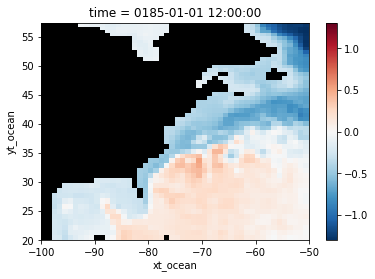

In [51]:
sea_level.isel(time=0).plot(cmap=CMAP)

In [52]:
model = EOF_model(sea_level)

In [53]:
model.fit(pc_dim='time')

In [54]:
model.df.head()

yt_ocean            20.451127                                          \
xt_ocean                -97.5     -96.5     -95.5     -94.5     -93.5   
time                                                                    
0185-01-01 12:00:00 -0.018764 -0.010759 -0.074638 -0.017395  0.040936   
0185-01-02 12:00:00 -0.045116 -0.029851 -0.068669 -0.011168  0.042932   
0185-01-03 12:00:00 -0.041274 -0.025973 -0.053630  0.003476  0.051797   
0185-01-04 12:00:00  0.003077 -0.026161 -0.069980 -0.013125  0.032832   
0185-01-05 12:00:00  0.058272 -0.000219 -0.082272 -0.031614  0.010700   

yt_ocean                                                               ...  \
xt_ocean                -92.5     -91.5     -90.5     -87.5     -86.5  ...   
time                                                                   ...   
0185-01-01 12:00:00  0.080438  0.116498  0.145072  0.009151 -0.024694  ...   
0185-01-02 12:00:00  0.080929  0.100570  0.109434  0.035923 -0.008334  ...   
0185-01-03 12:00:00  0.077424  0.076717  0.071590  0.041729 -0.001942  ...   
0185-01-04 12:00:00  0.048626  0.049124  0.040973  0.027032 -0.013889  ...   
0185-01-05 12:00:00  0.027158  0.033909  0.053475  0.018028 -0.021655  ...   

yt_ocean            57.102836                                          \
xt_ocean                -59.5     -58.5     -57.5     -56.5     -55.5   
time                                                                    
0185-01-01 12:00:00  0.068584 -0.020598 -0.005399  0.008275 -0.003986   
0185-01-02 12:00:00  0.069433 -0.014064 -0.009863  0.006298 -0.005735   
0185-01-03 12:00:00  0.084219  0.004491  0.004256  0.019462  0.002107   
0185-01-04 12:00:00  0.064635 -0.005230 -0.005044  0.012181 -0.010807   
0185-01-05 12:00:00  0.059518 -0.020524 -0.023023 -0.007824 -0.039089   

yt_ocean                                                               
xt_ocean                -54.5     -53.5     -52.5     -51.5     -50.5  
time                                                                   
0185-01-01 12:00:00 -0.000010 -0.018284 -0.004184  0.002506 -0.022490  
0185-01-02 12:00:00  0.005208 -0.008487  0.008718  0.015689 -0.014877  
0185-01-03 12:00:00  0.013959  0.002256  0.020177  0.027250 -0.006529  
0185-01-04 12:00:00 -0.001537 -0.012812  0.003214  0.009092 -0.028290  
0185-01-05 12:00:00 -0.040251 -0.056709 -0.048307 -0.046745 -0.086998  

[5 rows x 1352 columns]

In [55]:
# Functions and attributes
[attr for attr in dir(model) if attr[0] != '_']

['EOFs',
 'PCs',
 'SVs',
 'cummulative_variance',
 'darray',
 'df',
 'eof_dims',
 'fit',
 'get_EOF',
 'get_PC',
 'get_SV',
 'low_rank_approximation',
 'min_rank',
 'pc_dim',
 'plot_EOF',
 'plot_PC',
 'plot_variances',
 'variances']

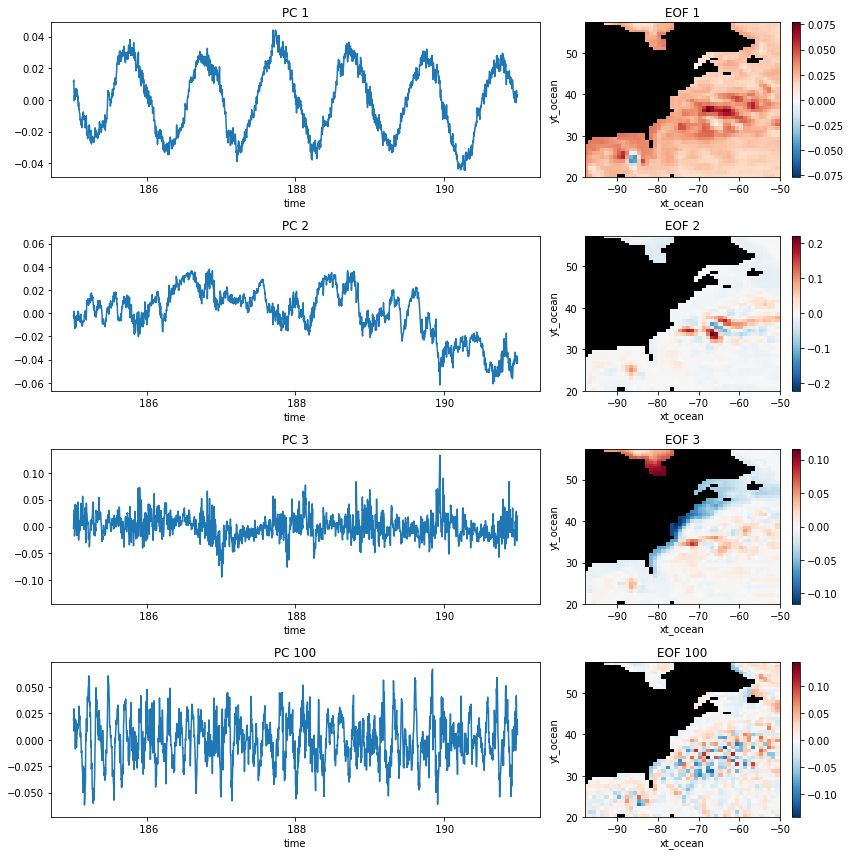

In [56]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12,12), gridspec_kw={'width_ratios': (2,1)})
for i, k in enumerate([1, 2, 3, 100]):
    model.plot_PC(k=k, ax=axes[i, 0])
    model.plot_EOF(k=k, ax=axes[i, 1])
    
fig.tight_layout()

We see PC 1 reveals the seasonal cycle, PC 2 might be some type of Gulf Stream variability, and PC 3 shows the impact of storms and associated wave propagation along the coast (skewed timeseries and homogenous continental shelf). PC 100 is just pure noise.

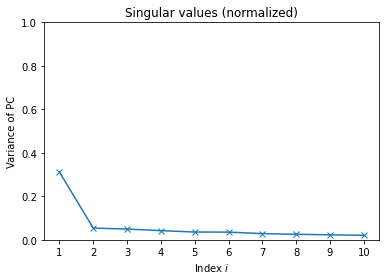

In [58]:
model.plot_variances()

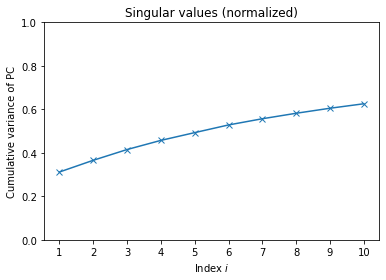

In [59]:
model.plot_variances(cumulative=True, kmax=10)

Text(0.5, 1.0, 'Rank 10 approximation')

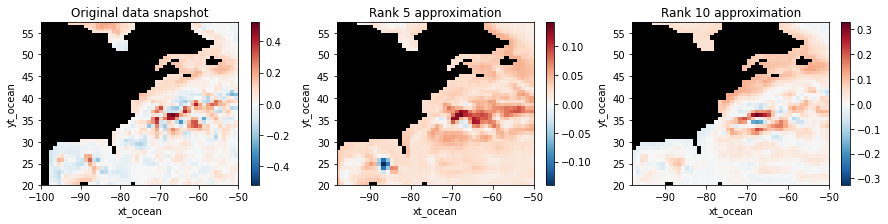

In [63]:
fig, axes = plt.subplots(ncols=3, figsize=(15,3))

(sea_level.isel(time=0) - sea_level.mean(dim='time')).plot(ax=axes[0])
axes[0].set_title('Original data snapshot')

darray = model.low_rank_approximation(5)
darray.isel(time=0).plot(ax=axes[1])
axes[1].set_title('Rank 5 approximation')

darray = model.low_rank_approximation(10)
darray.isel(time=0).plot(ax=axes[2])
axes[2].set_title('Rank 10 approximation')

In [64]:
model.min_rank(var=0.9)

44

In [65]:
X_r = model.low_rank_approximation(net_variance=0.9)

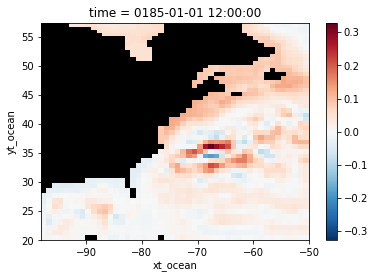

In [66]:
X_r.isel(time=0).plot()